In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('iphone_purchase_records.csv')

In [3]:
df.head()

,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


# EDA and Data Vizualisation

In [4]:
df.shape

(400, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   Salary           400 non-null    int64 
 3   Purchase Iphone  400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [6]:
df.describe()

,Age,Salary,Purchase Iphone
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [7]:
df.isnull().sum()

Gender             0
Age                0
Salary             0
Purchase Iphone    0
dtype: int64

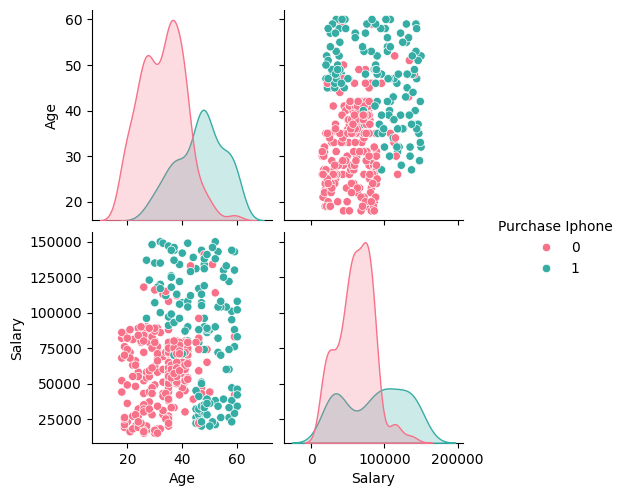

In [8]:
sns.pairplot(df, hue='Purchase Iphone', vars=['Age', 'Salary'], palette='husl')
plt.savefig("pair plot.png")
plt.show()

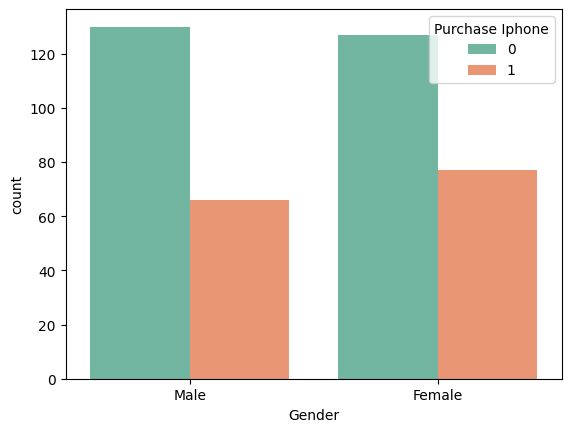

In [9]:
sns.countplot(x='Gender', hue='Purchase Iphone', data=df, palette='Set2')
plt.savefig("gender countplot.png")
plt.show()

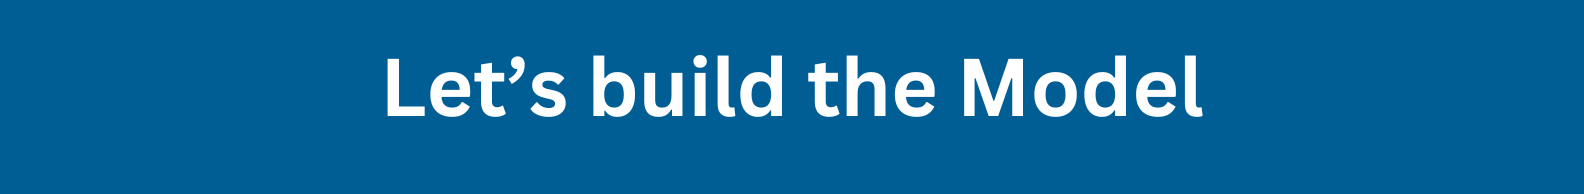

In [10]:
df.columns

Index(['Gender', 'Age', 'Salary', 'Purchase Iphone'], dtype='object')

# First, separate the columns

In [11]:
X = df[['Age','Salary']]

In [12]:
X

,Age,Salary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [13]:
Y = df['Purchase Iphone']

In [14]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchase Iphone, Length: 400, dtype: int64

# Let's split Dataset

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

In [17]:
X_train.shape, X_test.shape

((320, 2), (80, 2))

# Now we have to select K

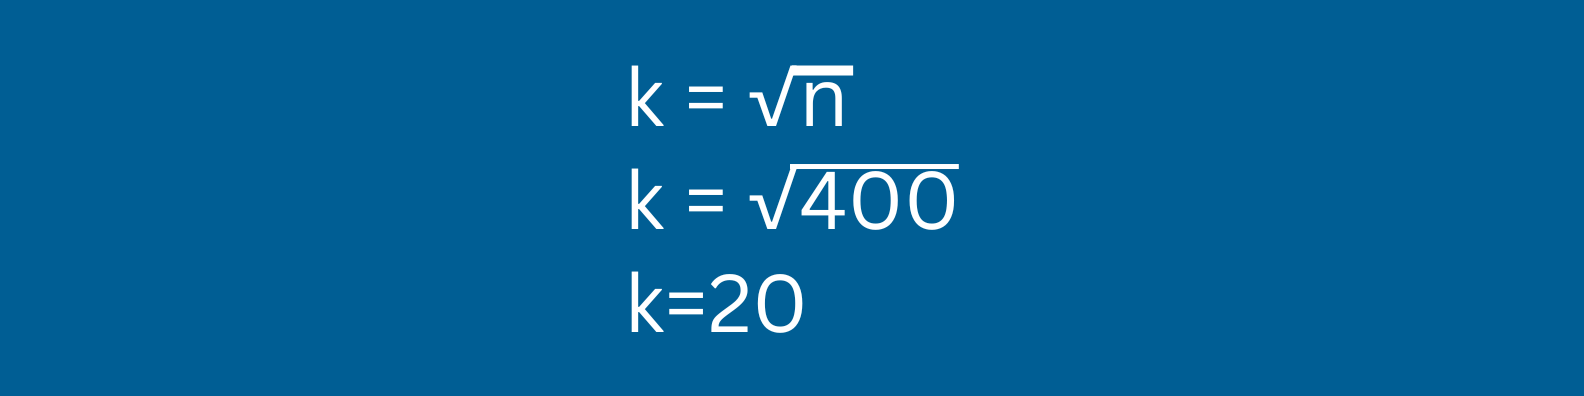

In [18]:
from math import sqrt
sqrt(df.shape[0])

20.0

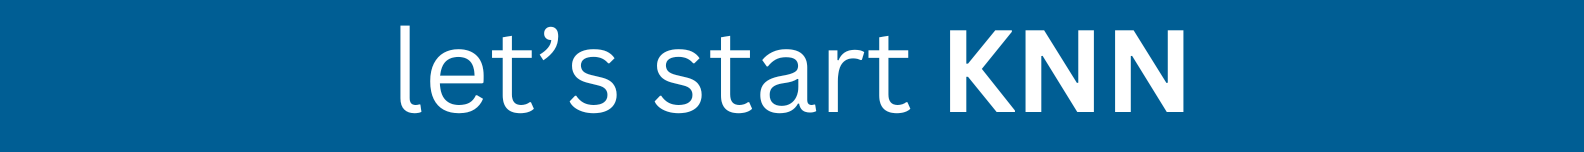

In [19]:
from sklearn.neighbors import KNeighborsClassifier

First let's create a KNN classifier model

In [20]:
clf = KNeighborsClassifier(n_neighbors=15)

"n_neighbors=15" because 15 is near to 20 and it is a odd number

Let's train the model

In [21]:
clf.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=15)

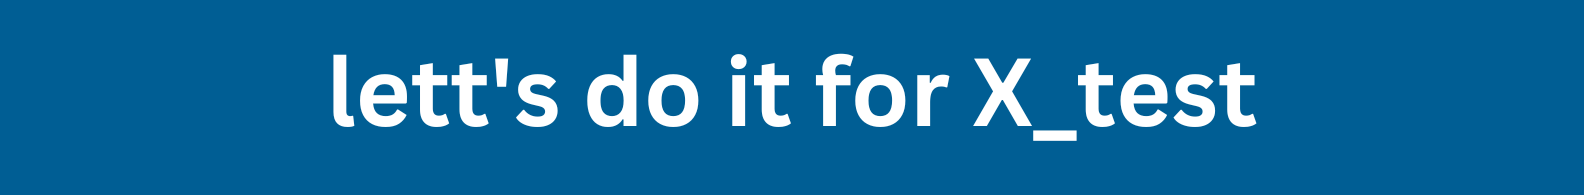

In [22]:
pred = clf.predict(X_test)

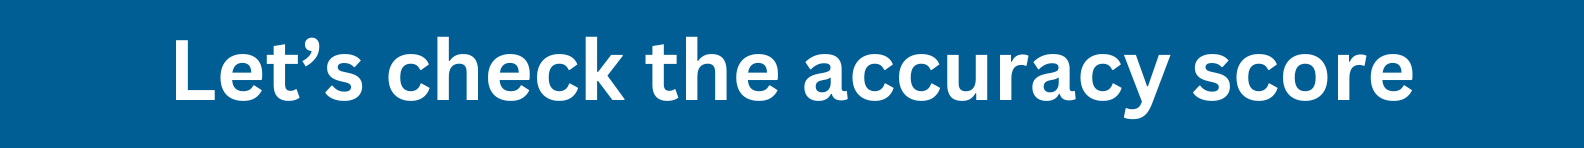

In [23]:
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

In [24]:
accuracy_score(Y_test,pred)

0.9

### 90 % accuracy 🥳

# Precision Score

In [25]:
precision_score(Y_test,pred)

0.8260869565217391

# Let's plot on heatmap

<Axes: >

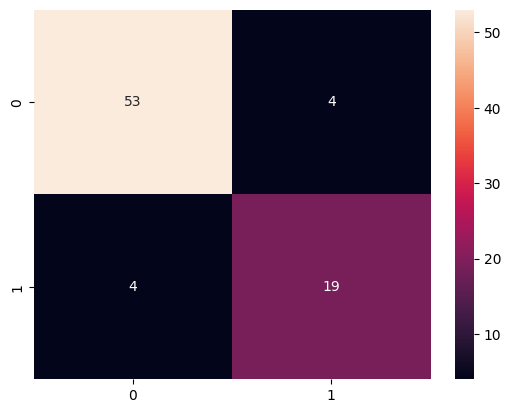

In [26]:
sns.heatmap(confusion_matrix(Y_test,pred),annot = True)